In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget
from MotionBERT.common_import import *
from hpe_library.pcl_utils import *

In [23]:
data_type_list = ['source_list', 'cam_param',
                  'cam_3d', 'img_2d', 'cam_3d_canonical_revolute', 'img_2d_canonical_revolute',
]
overwrite_list = []
dataset_name = 'h36m'
data_aug = default_data_aug.copy()
data = load_data_dict(dataset_name, data_type_list, overwrite_list, verbose=True, data_aug=data_aug)

[overwrite: False] ==> Loading H36M source_list...
[overwrite: False] ==> Loading H36M cam_param...
[overwrite: False] ==> Loading H36M cam_3d...
[overwrite: False] ==> Loading H36M img_2d...
[overwrite: False] ==> Loading H36M cam_3d_canonical_revolute...
[overwrite: False] ==> Loading H36M img_2d_canonical_revolute...


In [24]:
subject = 'S9'
action = 'Walking 1'
cam_id = '54138969'
source_list = data['source_list'].copy()
subject, cam_id, action = split_source_name(source_list[0], dataset_name)

# camera parameters
cam_param = data['cam_param'][subject][action][cam_id].copy()
W, H, intrinsic = cam_param['W'], cam_param['H'], cam_param['intrinsic']
fx, fy, cx, cy = intrinsic[0, 0], intrinsic[1, 1], intrinsic[0, 2], intrinsic[1, 2]
# original 3D/2D pose
cam_3d = data['cam_3d'][subject][action][cam_id].copy() #+ np.array([1, 0, -3])
cam_3d_canonical = data['cam_3d_canonical_revolute'][subject][action][cam_id].copy()
img_2d = data['img_2d'][subject][action][cam_id].copy()
img_2d_canonical = data['img_2d_canonical_revolute'][subject][action][cam_id].copy()
# root-relative 3D pose
cam_3d_hat = cam_3d.copy() - cam_3d[:, 0:1]
# input centered 2D pose
img_2d_centered = img_2d.copy() - img_2d[:, 0:1] + np.array([cx, cy])

### check pose reversal

In [14]:
cam_3d_reflected = cam_3d.copy()
cam_3d_reflected[...,2] *= -1
cam_3d_reversed = cam_3d_reflected.copy() - cam_3d_reflected[:, 0:1] + cam_3d[:, 0:1]
img_2d_reflected = projection(cam_3d_reflected, intrinsic)
img_2d_reversed = projection(cam_3d_reversed, intrinsic)

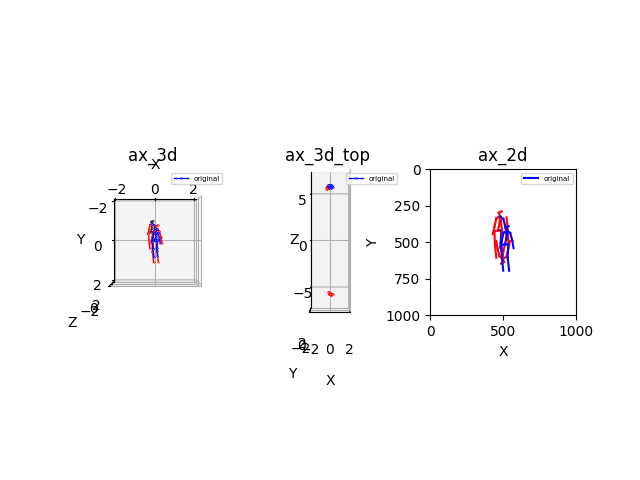

In [20]:
## check original train data
frame_num = 200
configs = {
    'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 132, 'mode': 'cam_top', 'zlim': [-7, 7]},
    'ax_2d': {'type': '2d', 'loc': 133, 'W': W, 'H': H},
}
fig, axs = generate_axes(0, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d,     {'color': '', 'label': 'original'}),
    ('ax_3d', cam_3d_reflected,     {'color': 'r', 'label': 'original'}),
    ('ax_3d', cam_3d_reversed,     {'color': 'b', 'label': 'original'}),
    ('ax_3d_top', cam_3d, {'color': '', 'label': 'original'}),
    ('ax_3d_top', cam_3d_reflected, {'color': 'r', 'label': 'original'}),
    ('ax_3d_top', cam_3d_reversed, {'color': 'b', 'label': 'original'}),
    ('ax_2d', img_2d,     {'color': '', 'label': 'original'}),
    ('ax_2d', img_2d_reflected,     {'color': 'r', 'label': 'original'}),
    ('ax_2d', img_2d_reversed,     {'color': 'b', 'label': 'original'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()

In [28]:
cam_3d_reflected = cam_3d_canonical.copy()
cam_3d_reflected[...,2] *= -1
cam_3d_reversed = cam_3d_reflected.copy() - cam_3d_reflected[:, 0:1] + cam_3d_canonical[:, 0:1]
img_2d_reflected = projection(cam_3d_reflected, intrinsic)
img_2d_reversed = projection(cam_3d_reversed, intrinsic)

cam_3d_canonical_hat = cam_3d_canonical.copy() - cam_3d_canonical[:, 0:1]
cam_3d_reversed_hat = cam_3d_reversed.copy() - cam_3d_reversed[:, 0:1]

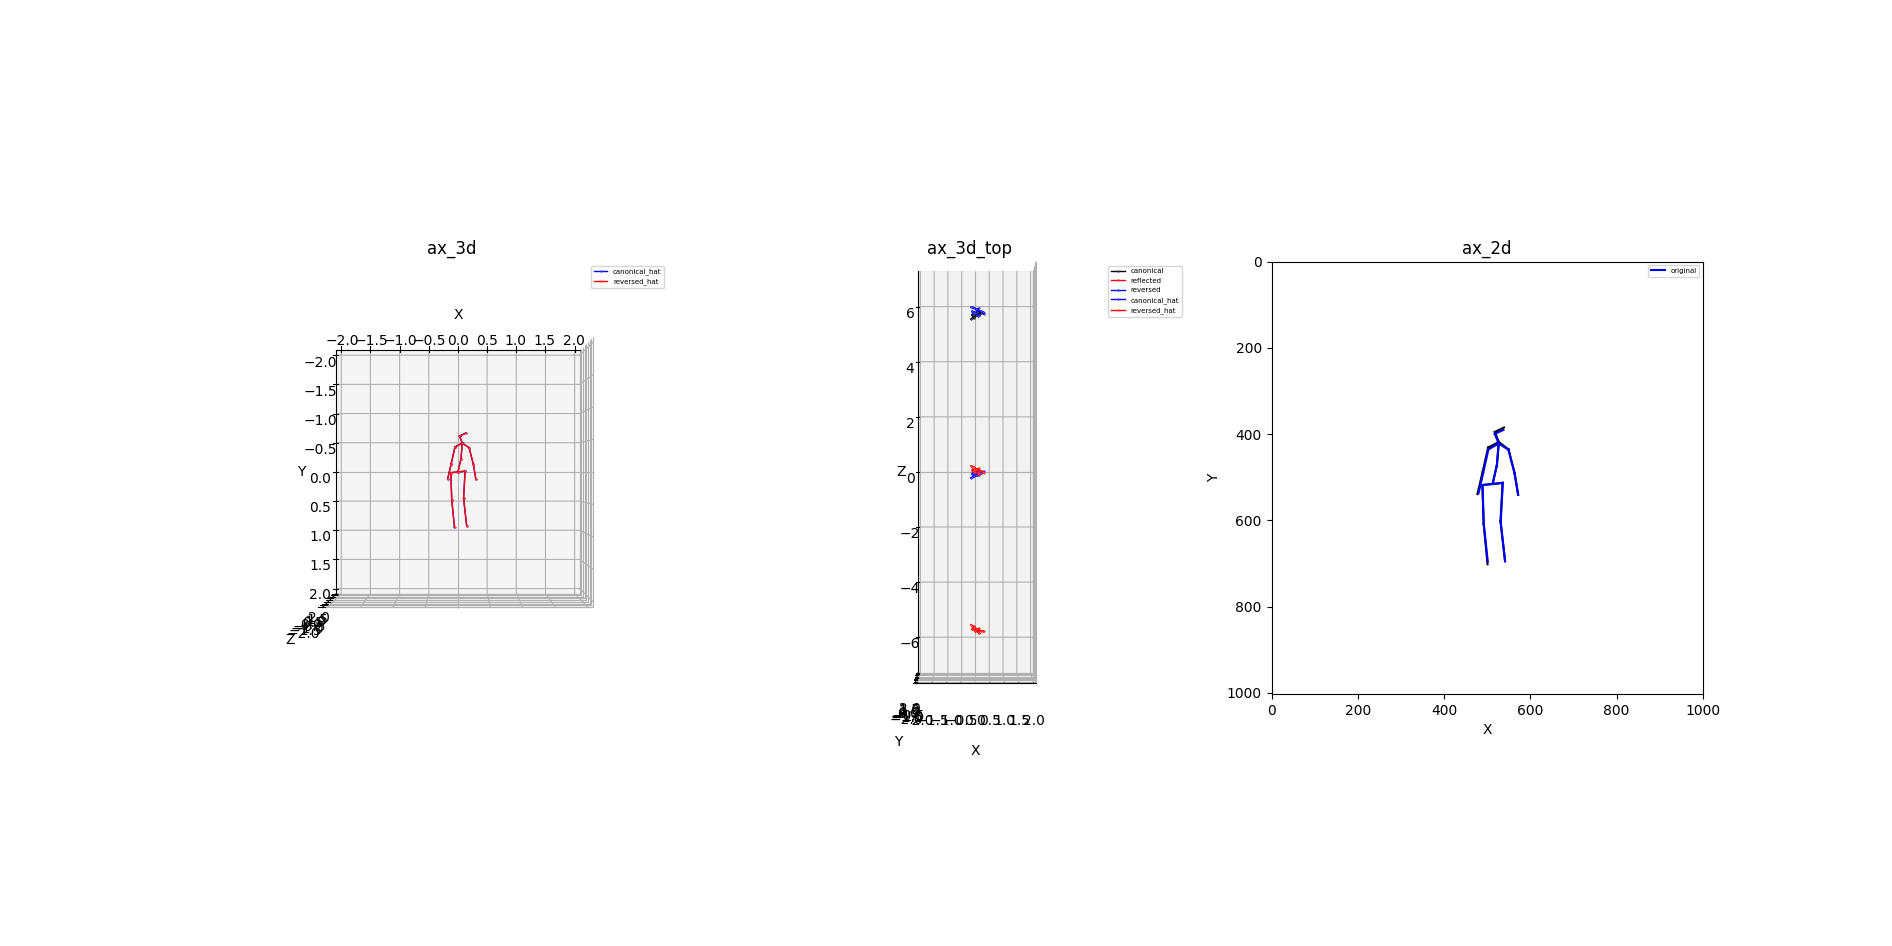

In [31]:
## check original train data
frame_num = 200
configs = {
    'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 132, 'mode': 'cam_top', 'zlim': [-7, 7]},
    'ax_2d': {'type': '2d', 'loc': 133, 'W': W, 'H': H},
}
fig, axs = generate_axes(1, configs, fig_title='')
plot_pose_setting = [
    #('ax_3d', cam_3d_canonical,     {'color': 'k', 'label': 'canonical'}),
    #('ax_3d', cam_3d_reflected,     {'color': 'r', 'label': 'reflected'}),
    #('ax_3d', cam_3d_reversed,     {'color': 'b', 'label': 'reversed'}),
    ('ax_3d', cam_3d_canonical_hat,     {'color': 'b', 'label': 'canonical_hat'}),
    ('ax_3d', cam_3d_reversed_hat,     {'color': 'r', 'label': 'reversed_hat'}),
    ('ax_3d_top', cam_3d_canonical, {'color': 'k', 'label': 'canonical'}),
    ('ax_3d_top', cam_3d_reflected, {'color': 'r', 'label': 'reflected'}),
    ('ax_3d_top', cam_3d_reversed, {'color': 'b', 'label': 'reversed'}),
    ('ax_3d_top', cam_3d_canonical_hat,     {'color': 'b', 'label': 'canonical_hat'}),
    ('ax_3d_top', cam_3d_reversed_hat,     {'color': 'r', 'label': 'reversed_hat'}),
    ('ax_2d', img_2d_canonical,     {'color': 'k', 'label': ''}),
    #('ax_2d', img_2d_reflected,     {'color': 'r', 'label': 'original'}),
    ('ax_2d', img_2d_reversed,     {'color': 'b', 'label': 'original'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()

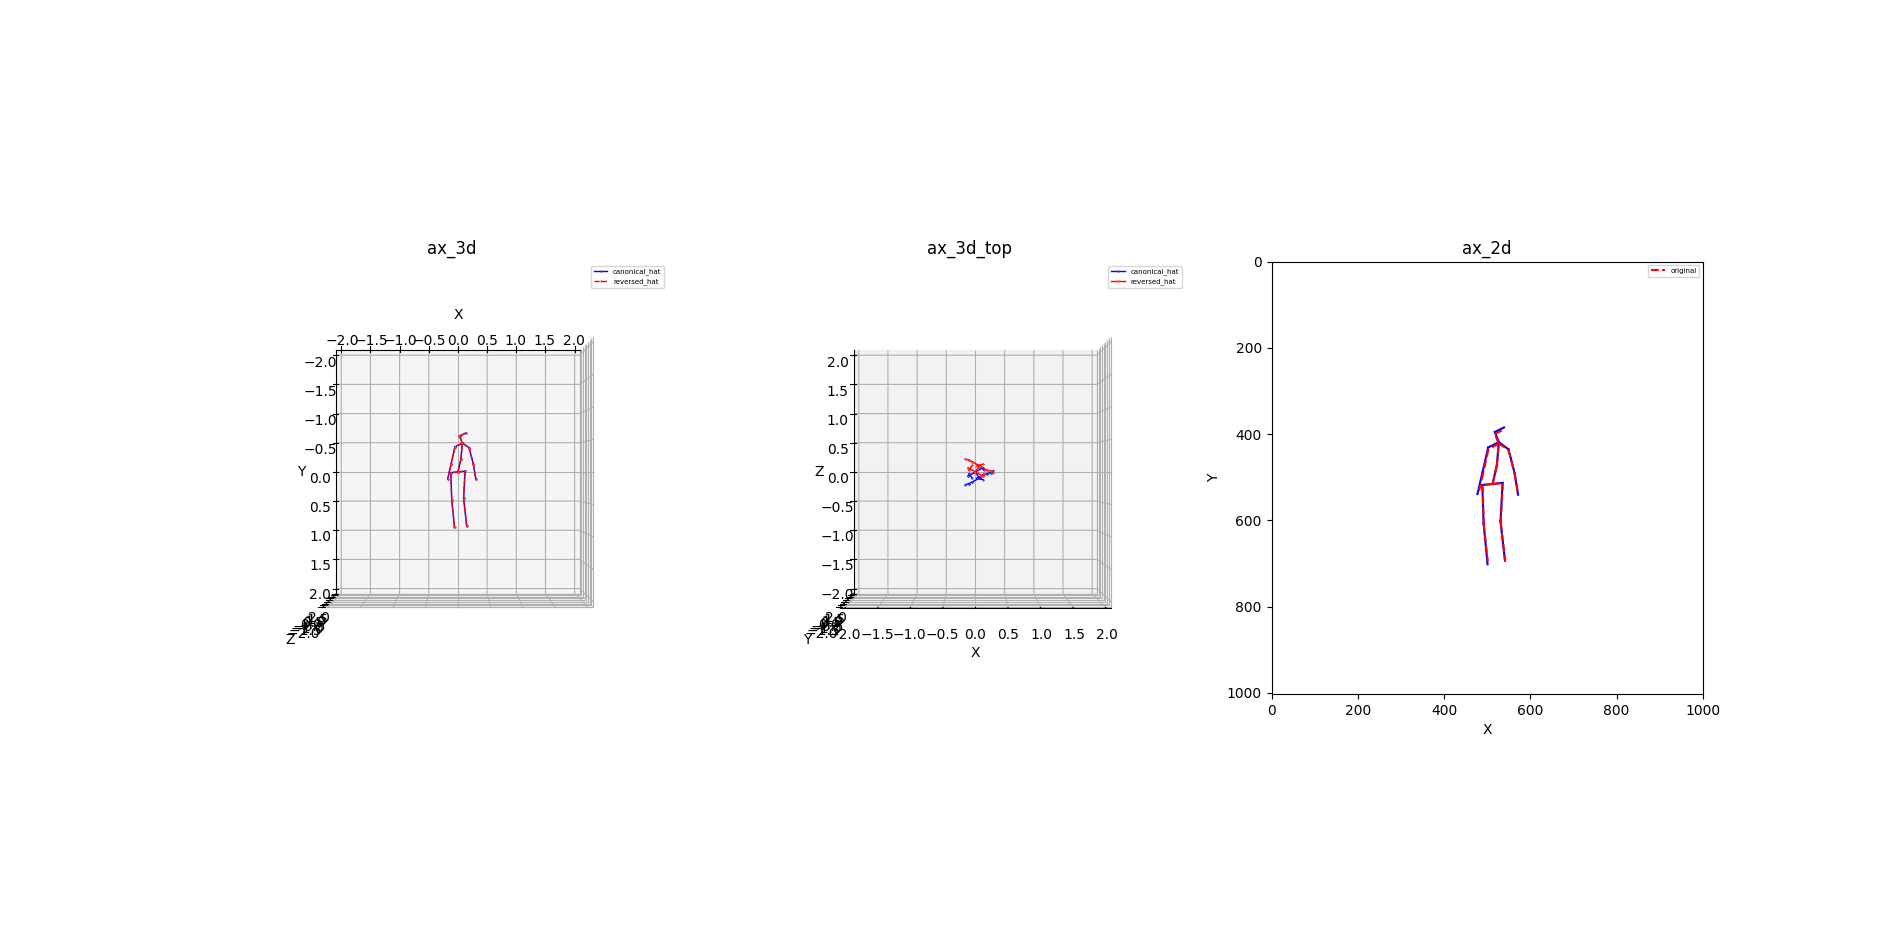

In [36]:
## check original train data
frame_num = 200
configs = {
    'ax_3d': {'type': '3d', 'loc': 131, 'mode': 'cam'},
    'ax_3d_top': {'type': '3d', 'loc': 132, 'mode': 'cam_top', 'zlim': [-2, 2]},
    'ax_2d': {'type': '2d', 'loc': 133, 'W': W, 'H': H},
}
fig, axs = generate_axes(1, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d_canonical_hat,     {'color': 'b', 'label': 'canonical_hat'}),
    ('ax_3d', cam_3d_reversed_hat,     {'color': 'r', 'label': 'reversed_hat', 'linestyle': '--'}),
    ('ax_3d_top', cam_3d_canonical_hat,     {'color': 'b', 'label': 'canonical_hat'}),
    ('ax_3d_top', cam_3d_reversed_hat,     {'color': 'r', 'label': 'reversed_hat'}),
    ('ax_2d', img_2d_canonical,     {'color': 'b', 'label': ''}),
    ('ax_2d', img_2d_reversed,     {'color': 'r', 'label': 'original', 'linestyle': '--'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
plt.show()

In [39]:
# save video
save_folder = 'videos/canonical/only_front'
if not os.path.exists(save_folder):
    os.makedirs(save_folder)
generate_plot_video(fig, f'{save_folder}/{subject}_{action}_{cam_id}_canonical_vs_reversed.mp4', len(img_2d_canonical), lambda x: general_plot_func(axs, configs, plot_pose_setting, x), fps=5, stride=6, overwrite=False)

  0%|          | 0/240 [00:00<?, ?it/s]

IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (2852, 1226) to (2864, 1232) to ensure video compatibility with most codecs and players. To prevent resizing, make your input image divisible by the macro_block_size or set the macro_block_size to 1 (risking incompatibility).
100%|██████████| 240/240 [00:36<00:00,  6.61it/s]


Saved: /home/hrai/codes/MotionBERT/videos/canonical/only_front/S1_Waiting 1_54138969_canonical_vs_reversed.mp4


### pose direction classification

In [43]:
cam_3d_canonical_hat.shape

(1440, 17, 3)

In [76]:
batch_lower_frame_origin, batch_lower_frame_R = get_batch_lower_torso_frame_from_pose(torch.tensor(cam_3d_canonical_hat).unsqueeze(0))
batch_lower_frame_R = batch_lower_frame_R.squeeze(0).numpy()

In [77]:
batch_lower_frame_R.shape

(1440, 3, 3)

In [82]:
to_reverse = np.where(batch_lower_frame_R[:, :, 0][:, 2] > 0)[0]

In [95]:
batch_lower_frame_R[:, :, 0][:, 2]

array([0.7670242 , 0.7584744 , 0.75978816, ..., 0.16749862, 0.14790823,
       0.12824045], dtype=float32)

In [91]:
200 in to_reverse

True

In [94]:
to_reverse

array([   0,    1,    2, ..., 1437, 1438, 1439])

In [87]:
cam_3d_canonical_only_front = cam_3d_canonical.copy()
cam_3d_canonical_only_front[to_reverse][..., 2] *= -1
cam_3d_canonical_only_front[to_reverse] = cam_3d_canonical_only_front[to_reverse] - cam_3d_canonical_only_front[to_reverse][:, 0:1] + cam_3d_canonical[to_reverse][:, 0:1]
cam_3d_canonical_only_front_hat = cam_3d_canonical_only_front.copy() - cam_3d_canonical_only_front[:, 0:1]

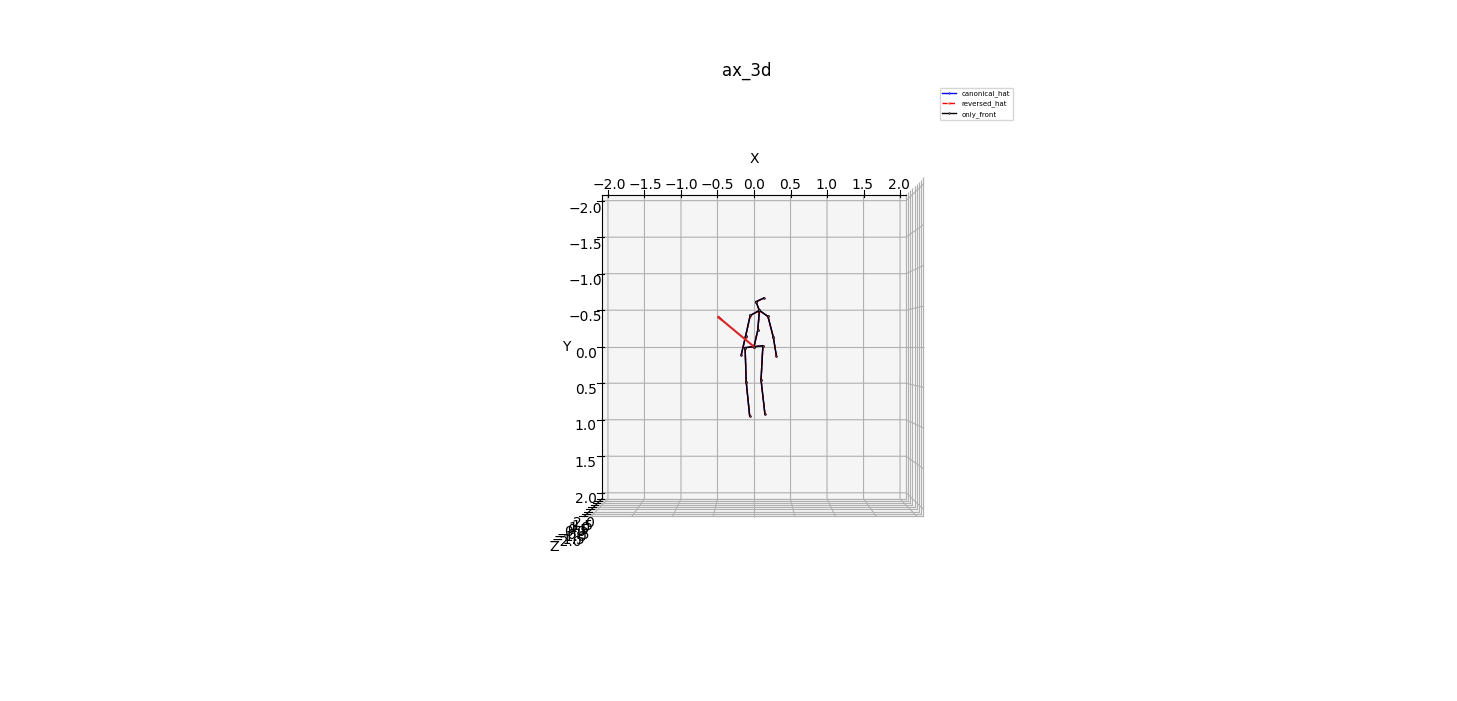

In [92]:
>## check original train data
frame_num = 200
configs = {
    'ax_3d': {'type': '3d', 'loc': 111, 'mode': 'cam'},
}
fig, axs = generate_axes(2, configs, fig_title='')
plot_pose_setting = [
    ('ax_3d', cam_3d_canonical_hat,     {'color': 'b', 'label': 'canonical_hat'}),
    ('ax_3d', cam_3d_reversed_hat,     {'color': 'r', 'label': 'reversed_hat', 'linestyle': '--'}),
    ('ax_3d', cam_3d_canonical_only_front_hat,     {'color': 'k', 'label': 'only_front'}),
]
general_plot_func(axs, configs, plot_pose_setting, frame_num)
draw3d_arrow(batch_lower_frame_origin[0][frame_num], batch_lower_frame_R[:, :, 0][frame_num], head_length=0.1, color="tab:red", ax = axs['ax_3d'])
plt.show()